In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error 

In [2]:
data=pd.read_csv('breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [6]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})

In [9]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [12]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train) 

/home/sreenal/anaconda3/envs/Gpy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
classifier.score(X_train,y_train)

0.9553805774278216

Random Forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier() 
clf.fit(X_train,y_train)
score = clf.score(X_train,y_train)
print(f"Train Accuarcy for {clf.__class__.__name__} is {score}") 
score = clf.score(X_test, y_test) 
print(f"Test Accuarcy for {clf.__class__.__name__} is {score}") 
print("========================") 

Train Accuarcy for RandomForestClassifier is 1.0
Test Accuarcy for RandomForestClassifier is 0.9521276595744681


Logistic Regres:ion

In [15]:
 clf = LogisticRegression() 
 clf.fit(X_train,y_train) 
 score = clf.score(X_train,y_train) 
 print(f"Train Accuarcy for {clf.__class__.__name__} is {score}") 
 score = clf.score(X_test, y_test) 
 print(f"Test Accuarcy for {clf.__class__.__name__} is {score}") 
 print("========================") 

Train Accuarcy for LogisticRegression is 0.9553805774278216
Test Accuarcy for LogisticRegression is 0.9574468085106383


/home/sreenal/anaconda3/envs/Gpy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
x=pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False) 

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.1.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/sreenal/anaconda3/envs/Gpy/lib/python3.10/site-packages
Requires: threadpoolctl, numpy, joblib, scipy
Required-by: mapclassify, imbalanced-learn


/home/sreenal/anaconda3/envs/Gpy/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

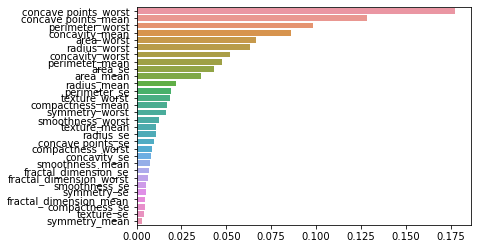

In [ ]:
import seaborn as sns 
sns.barplot(x,y=x.index) 